Pour le slide =>
Process de création du model:
- non-linearity ?
- normalisation !!!!
- encodage !

In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Data

In [3]:
# Import csv
# ! TODO Data à normaliser !!!!!!!!!!!
# df = pd.read_csv("./1_label_encoded.csv")
df = pd.read_csv("./2_normalized_with_standard_scaler")
# df = pd.read_csv("./2bis_normalized_with_minmax")
print(f"Nombre de classes:{len(df['label'].unique())}")
df 

Nombre de classes:10


,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,-1.214016,-0.771816,-0.514582,-0.886740,0.051430,1.225599,-0.754024,0.264232,0.954902,-1.190357,...,-1.567815,-0.044148,-0.143056,-0.392575,-2.066409,-1.630571,-1.866883,-2.047651,-3.372445,0
1,-1.249187,-1.224846,-1.180507,-0.648359,0.794166,0.887066,0.643930,0.624060,0.065638,0.313286,...,-0.993508,0.283149,1.370343,0.732814,-0.388719,0.227296,-0.570795,0.149920,-1.736623,0
2,0.323357,0.109880,0.103005,-0.001913,-0.122723,-0.585695,0.800639,-2.352819,1.243518,-1.381017,...,0.281147,-2.641585,0.137661,-1.163176,-0.557556,-1.175433,1.201404,-1.541924,-0.350787,0
3,-0.585922,-0.536687,-0.398051,-0.682836,0.497384,-0.128158,0.163519,-1.571946,-0.131499,-0.407994,...,-0.102358,0.813606,-1.373482,0.711632,-0.508084,0.451344,-0.722501,1.389025,-0.818474,0
4,-1.633756,-1.466779,-1.434038,-1.564058,0.381496,1.421567,-1.209373,0.764905,0.629119,-0.349531,...,-2.242029,-1.765814,-2.870061,-1.722523,-3.431703,-1.351264,-1.626074,-1.450576,-1.588621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.885576,-0.683258,-0.604677,0.526270,0.969805,0.496242,-1.481340,0.357816,-1.403936,0.292814,...,-0.747119,0.842688,-0.683157,-0.143086,-0.899173,-0.070235,-0.820230,-0.324597,-0.090366,9
996,0.813475,0.828715,0.830111,0.702909,-0.728986,0.235988,-0.495868,0.759770,-0.728779,0.948909,...,-0.708987,0.541411,-1.074375,0.482261,-0.581913,-0.232415,-0.749758,-0.172735,-1.005139,9
997,1.256517,1.112293,0.883515,0.861051,-1.182831,-0.172292,-0.261097,0.758092,-1.046185,0.909393,...,-1.020891,0.978953,-0.652855,0.700054,-0.022525,0.417860,-0.519804,-0.234315,-1.033425,9
998,0.413611,0.075959,-0.039283,-0.406204,-0.020835,-1.269649,0.488487,-1.360053,0.561709,-1.526231,...,-0.318561,-1.270933,-0.324334,-0.107782,-0.789053,-1.099362,1.644896,-1.163364,-0.029436,9


In [4]:
# df to numpy

y = df['label'].to_numpy()
x = df.drop(columns=['label']).to_numpy() # ! Type issue ?

print("X shape =>",x.shape,"\ny shape =>", y.shape)
y[:3], x[:3]

X shape => (1000, 23) 
y shape => (1000,)


(array([0, 0, 0]),
 array([[-1.21401634e+00, -7.71815688e-01, -5.14581532e-01,
         -8.86739523e-01,  5.14299343e-02,  1.22559896e+00,
         -7.54023866e-01,  2.64232322e-01,  9.54901848e-01,
         -1.19035692e+00,  4.74982385e-01, -1.84506086e+00,
         -4.21281238e-01, -2.52070362e+00, -1.56781474e+00,
         -4.41483691e-02, -1.43055825e-01, -3.92575420e-01,
         -2.06640887e+00, -1.63057133e+00, -1.86688298e+00,
         -2.04765114e+00, -3.37244513e+00],
        [-1.24918703e+00, -1.22484604e+00, -1.18050683e+00,
         -6.48358953e-01,  7.94165515e-01,  8.87066078e-01,
          6.43929996e-01,  6.24060471e-01,  6.56380212e-02,
          3.13286074e-01, -3.23930068e-01, -1.75678970e+00,
          3.77391969e-01,  7.12680185e-02, -9.93507974e-01,
          2.83148529e-01,  1.37034287e+00,  7.32813680e-01,
         -3.88719366e-01,  2.27296130e-01, -5.70794934e-01,
          1.49919724e-01, -1.73662258e+00],
        [ 3.23357488e-01,  1.09880005e-01,  1.0300501

In [5]:
# numpy to tensor

# x = torch.from_numpy(x).type(torch.float64)
# y = torch.from_numpy(y).type(torch.float64)
x = torch.from_numpy(x).type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

# x = torch.from_numpy(x)
# y = torch.from_numpy(y)

x[:3], y[:3]

(tensor([[-1.2140e+00, -7.7182e-01, -5.1458e-01, -8.8674e-01,  5.1430e-02,
           1.2256e+00, -7.5402e-01,  2.6423e-01,  9.5490e-01, -1.1904e+00,
           4.7498e-01, -1.8451e+00, -4.2128e-01, -2.5207e+00, -1.5678e+00,
          -4.4148e-02, -1.4306e-01, -3.9258e-01, -2.0664e+00, -1.6306e+00,
          -1.8669e+00, -2.0477e+00, -3.3724e+00],
         [-1.2492e+00, -1.2248e+00, -1.1805e+00, -6.4836e-01,  7.9417e-01,
           8.8707e-01,  6.4393e-01,  6.2406e-01,  6.5638e-02,  3.1329e-01,
          -3.2393e-01, -1.7568e+00,  3.7739e-01,  7.1268e-02, -9.9351e-01,
           2.8315e-01,  1.3703e+00,  7.3281e-01, -3.8872e-01,  2.2730e-01,
          -5.7079e-01,  1.4992e-01, -1.7366e+00],
         [ 3.2336e-01,  1.0988e-01,  1.0301e-01, -1.9128e-03, -1.2272e-01,
          -5.8570e-01,  8.0064e-01, -2.3528e+00,  1.2435e+00, -1.3810e+00,
           7.4426e-01, -3.2263e-01, -2.7827e-01, -5.1913e-01,  2.8115e-01,
          -2.6416e+00,  1.3766e-01, -1.1632e+00, -5.5756e-01, -1.1754e+00,


In [6]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([900, 23]),
 torch.Size([100, 23]),
 torch.Size([900]),
 torch.Size([100]))

# 2. Model

In [ ]:
# ! Model chatGPT => 'rangement' des layers interessants
# class MusicClassifier(nn.Module):
#     def __init__(self, input_size, hidden_sizes, output_size, dropout_prob):
#         super(MusicClassifier, self).__init__()
#         layers = []
        
#         # Input layer
#         layers.append(nn.Linear(input_size, hidden_sizes[0]))
#         layers.append(nn.ReLU())
        
#         # Hidden layers
#         for i in range(1, len(hidden_sizes)):
#             layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
#             layers.append(nn.ReLU())
#             layers.append(nn.BatchNorm1d(hidden_sizes[i]))
#             layers.append(nn.Dropout(p=dropout_prob))
        
#         # Output layer
#         layers.append(nn.Linear(hidden_sizes[-1], output_size))
#         layers.append(nn.LogSoftmax(dim=1))
        
#         self.model = nn.Sequential(*layers)
    
#     def forward(self, x):
#         return self.model(x)
# model_0 = MusicClassifier(input_size=23, output_size=10, hidden_sizes=[32,64,128], dropout_prob=0.7).to(device)

In [7]:
# ! try different combination of deep, wide, dropout, other activation function than Relu 

class MusicClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # ! Try other than RELU
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=output_features, dtype=torch.float32)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)
model_0 = MusicClassifier(input_features=23, output_features=10, hidden_unit=100).to(device)

model_0

MusicClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=23, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [8]:
# Loss and optimizer

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # ! Try Adam
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001) # It's better

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(input=y_true, other=y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 # Calcul simple de pourcentage
    return acc

In [9]:
# Quick forward pass
y_logits_quick_test = model_0(X_test.to(device))
torch.softmax(y_logits_quick_test, dim=1).argmax(dim=1)

tensor([4, 6, 4, 8, 4, 2, 6, 6, 4, 4, 4, 4, 4, 4, 8, 4, 4, 6, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
        4, 4, 6, 8, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 8, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4,
        6, 4, 9, 4], device='cuda:0')

# 3. Training

In [10]:
torch.manual_seed(42)

epochs = 5000

loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Metrics
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 2.1 Save metrics
    loss_history.append(loss.cpu().detach().numpy())
    acc_history.append(acc)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimmizer step
    optimizer.step()

    '''
    Test
    '''
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_0(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        # 2. Metrics
        test_loss = loss_fn(y_test_logits,
                            y_test)
        test_acc = accuracy_fn(y_pred=y_test_pred,
                               y_true=y_test)
        
        # 2.1 Save metrics
        test_loss_history.append(test_loss.cpu().detach().numpy())
        test_acc_history.append(test_acc)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.32303, Acc: 9.33% | Test Loss: 2.30547, Test Acc: 8.00%
Epoch: 100 | Loss: 1.12402, Acc: 61.56% | Test Loss: 1.20694, Test Acc: 62.00%
Epoch: 200 | Loss: 0.82730, Acc: 70.78% | Test Loss: 1.02339, Test Acc: 66.00%
Epoch: 300 | Loss: 0.64775, Acc: 78.33% | Test Loss: 0.98802, Test Acc: 65.00%
Epoch: 400 | Loss: 0.51993, Acc: 83.67% | Test Loss: 0.99907, Test Acc: 68.00%
Epoch: 500 | Loss: 0.37240, Acc: 87.33% | Test Loss: 1.04175, Test Acc: 67.00%
Epoch: 600 | Loss: 0.32453, Acc: 88.44% | Test Loss: 1.07248, Test Acc: 69.00%
Epoch: 700 | Loss: 0.28347, Acc: 90.11% | Test Loss: 1.14099, Test Acc: 67.00%
Epoch: 800 | Loss: 0.26127, Acc: 91.44% | Test Loss: 1.19921, Test Acc: 68.00%
Epoch: 900 | Loss: 0.22519, Acc: 93.00% | Test Loss: 1.24780, Test Acc: 68.00%
Epoch: 1000 | Loss: 0.22197, Acc: 91.78% | Test Loss: 1.31505, Test Acc: 69.00%
Epoch: 1100 | Loss: 0.15543, Acc: 94.89% | Test Loss: 1.35033, Test Acc: 69.00%
Epoch: 1200 | Loss: 0.14451, Acc: 96.00% | Test Loss: 

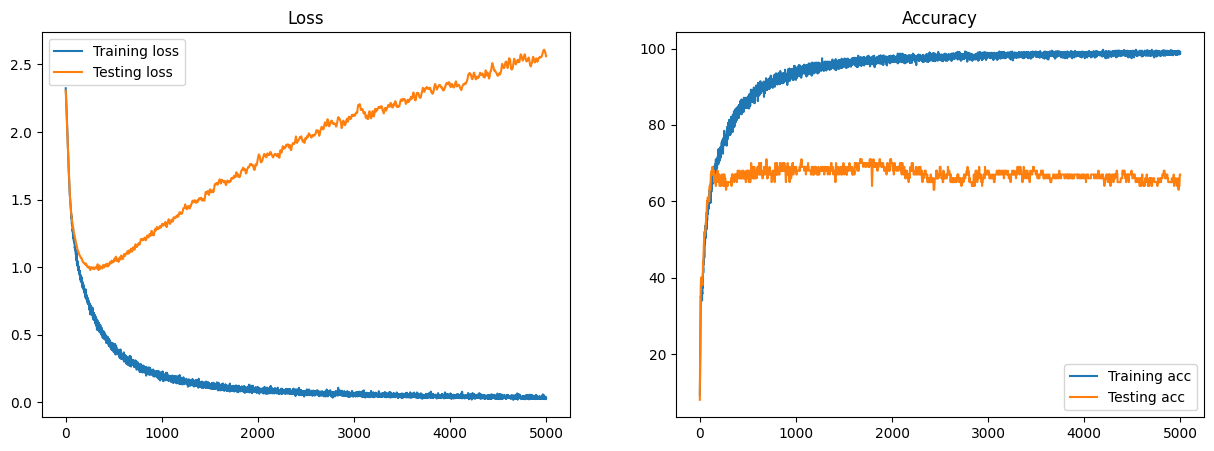

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_history, label="Training loss")
plt.plot(range(epochs), test_loss_history, label="Testing loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_history, label="Training acc")
plt.plot(range(epochs), test_acc_history, label="Testing acc")
plt.legend()
plt.title("Accuracy")

plt.show()